[INFO] 2025-03-25 21:57:28 - <fbpinns.constants.Constants object at 0x79bda33b34a0>
run: test
domain: <class 'fbpinns.domains.RectangularDomainND'>
domain_init_kwargs: {'xmin': array([0., 0.]), 'xmax': array([1., 1.])}
problem: <class 'fbpinns.problems.Poisson2D'>
problem_init_kwargs: {}
decomposition: <class 'fbpinns.decompositions.RectangularDecompositionND'>
decomposition_init_kwargs: {'subdomain_xs': [array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]), array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])], 'subdomain_ws': [array([0.32222222, 0.32222222, 0.32222222, 0.32222222, 0.32222222,
       0.32222222, 0.32222222, 0.32222222, 0.32222222, 0.32222222]), array([0.32222222, 0.32222222, 0.32222222, 0.32222222, 0.32222222,
       0.32222222, 0.32222222, 0.32222222, 0.32222222, 0.32222222])], 'unnorm': (0.0, 3.0)}
networ

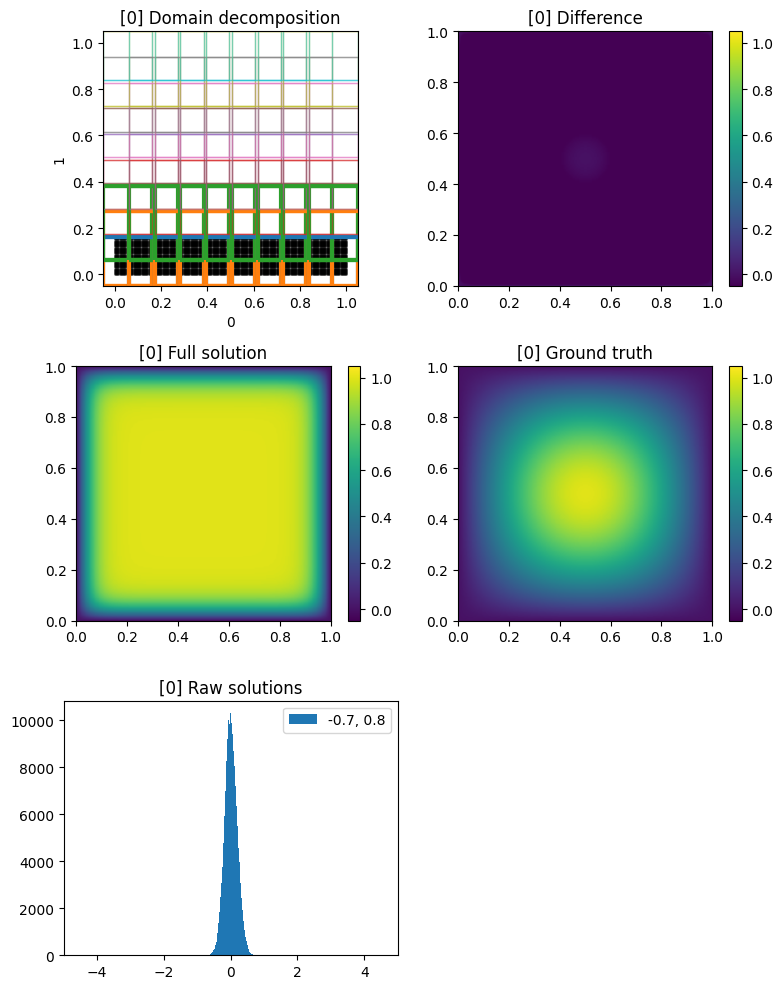

[INFO] 2025-03-25 21:57:45 - [i: 1000/100000] loss: 11380.9600 rate: 164.7 elapsed: 0.00 hr test
[INFO] 2025-03-25 21:57:45 - [i: 2000/100000] loss: 11380.9600 rate: 6281.7 elapsed: 0.00 hr test
[INFO] 2025-03-25 21:57:45 - [i: 3000/100000] loss: 11380.9600 rate: 5919.1 elapsed: 0.00 hr test
[INFO] 2025-03-25 21:57:45 - [i: 4000/100000] loss: 11380.9600 rate: 6824.5 elapsed: 0.00 hr test
[INFO] 2025-03-25 21:57:46 - [i: 5000/100000] loss: 11380.9600 rate: 7101.6 elapsed: 0.00 hr test
fs (('test', <Figure size 800x1000 with 8 Axes>),)
True


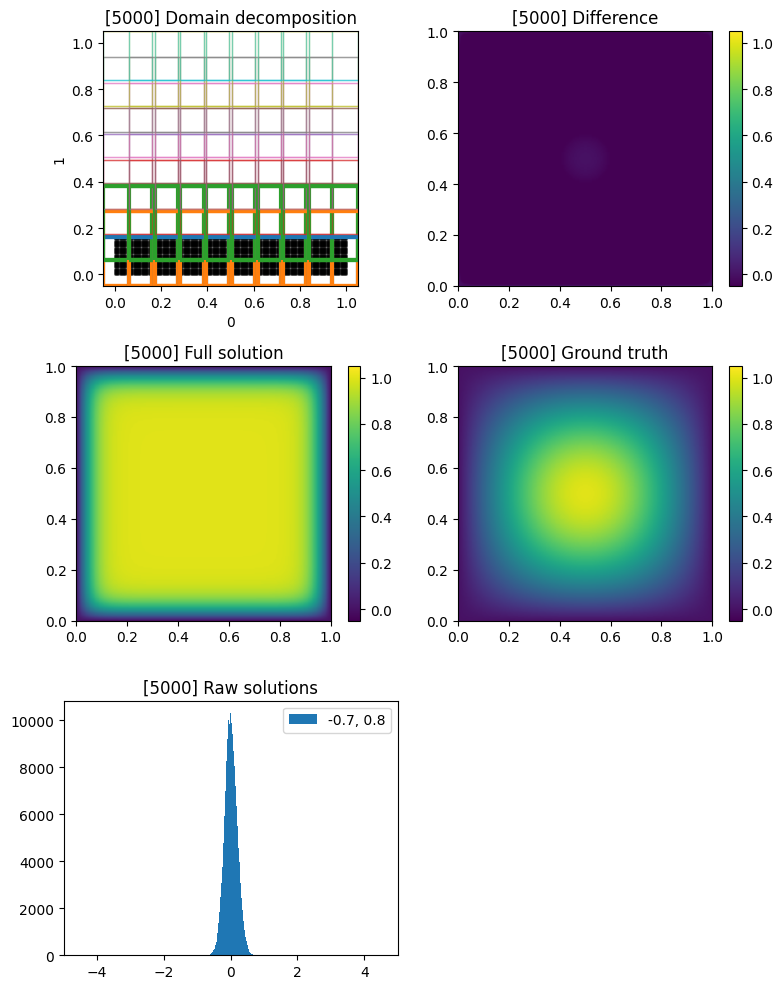

[INFO] 2025-03-25 21:57:47 - [i: 5264/100000] Updating active inputs..
[INFO] 2025-03-25 21:57:47 - [i: 5264/100000] Average number of points/dimension in active subdomains: 55.50
[INFO] 2025-03-25 21:57:52 - [i: 5264/100000] Updating active inputs done (4.86 s)
[INFO] 2025-03-25 21:57:52 - [i: 5264/100000] Compiling update step..
[INFO] 2025-03-25 21:57:52 - x_batch
[INFO] 2025-03-25 21:57:52 - (11000, 2), float32, JVPTracer
[INFO] 2025-03-25 21:57:52 - x_take
[INFO] 2025-03-25 21:57:52 - (84000, 2), float32, JVPTracer
input: (2,)
output: (1,)
[INFO] 2025-03-25 21:57:52 - x_batch
[INFO] 2025-03-25 21:57:52 - (11000, 2), float32, JVPTracer
[INFO] 2025-03-25 21:57:52 - x_take
[INFO] 2025-03-25 21:57:52 - (84000, 2), float32, JVPTracer
input: (2,)
output: (1,)
[INFO] 2025-03-25 21:57:53 - [i: 5264/100000] Compiling done (0.76 s)
[INFO] 2025-03-25 21:57:53 - [i: 6000/100000] loss: 8077.9990 rate: 173.1 elapsed: 0.00 hr test
[INFO] 2025-03-25 21:57:53 - [i: 7000/100000] loss: 8077.9990 rat

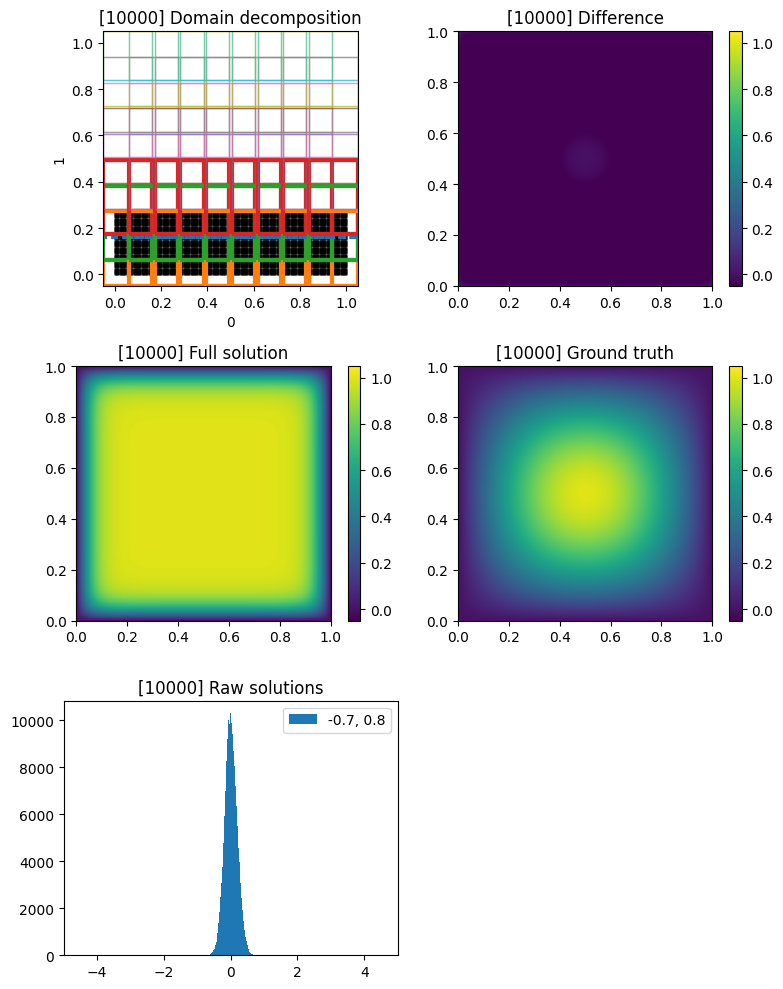

[INFO] 2025-03-25 21:57:55 - [i: 11000/100000] loss: 8077.9990 rate: 6771.7 elapsed: 0.01 hr test
[INFO] 2025-03-25 21:57:55 - [i: 12000/100000] loss: 8077.9990 rate: 6785.7 elapsed: 0.01 hr test
[INFO] 2025-03-25 21:57:55 - [i: 13000/100000] loss: 8077.9990 rate: 6335.3 elapsed: 0.01 hr test
[INFO] 2025-03-25 21:57:55 - [i: 14000/100000] loss: 8077.9990 rate: 6338.1 elapsed: 0.01 hr test
[INFO] 2025-03-25 21:57:56 - [i: 15000/100000] loss: 8077.9990 rate: 7123.7 elapsed: 0.01 hr test
fs (('test', <Figure size 800x1000 with 8 Axes>),)
True


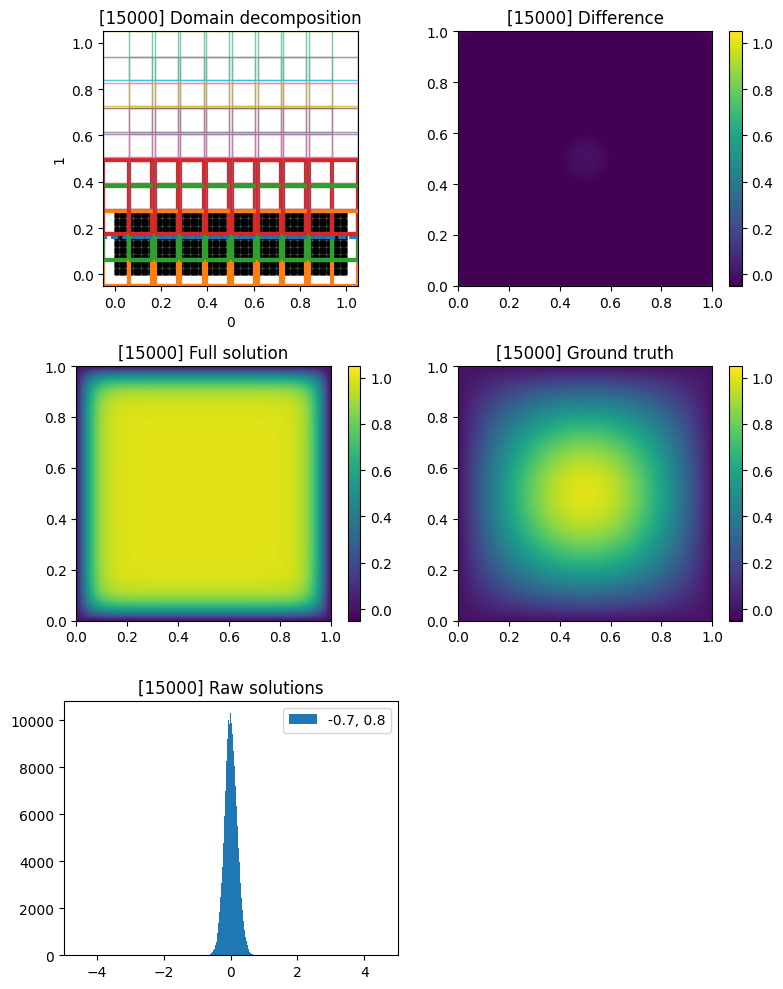

[INFO] 2025-03-25 21:57:57 - [i: 15790/100000] Updating active inputs..
[INFO] 2025-03-25 21:57:57 - [i: 15790/100000] Average number of points/dimension in active subdomains: 59.87
[INFO] 2025-03-25 21:58:02 - [i: 15790/100000] Updating active inputs done (4.91 s)
[INFO] 2025-03-25 21:58:02 - [i: 15790/100000] Compiling update step..
[INFO] 2025-03-25 21:58:02 - x_batch
[INFO] 2025-03-25 21:58:02 - (12800, 2), float32, JVPTracer
[INFO] 2025-03-25 21:58:02 - x_take
[INFO] 2025-03-25 21:58:02 - (105280, 2), float32, JVPTracer
input: (2,)
output: (1,)
[INFO] 2025-03-25 21:58:02 - x_batch
[INFO] 2025-03-25 21:58:02 - (12800, 2), float32, JVPTracer
[INFO] 2025-03-25 21:58:02 - x_take
[INFO] 2025-03-25 21:58:02 - (105280, 2), float32, JVPTracer
input: (2,)
output: (1,)
[INFO] 2025-03-25 21:58:03 - [i: 15790/100000] Compiling done (0.72 s)
[INFO] 2025-03-25 21:58:03 - [i: 16000/100000] loss: 4896.8896 rate: 172.6 elapsed: 0.01 hr test
[INFO] 2025-03-25 21:58:03 - [i: 17000/100000] loss: 4896

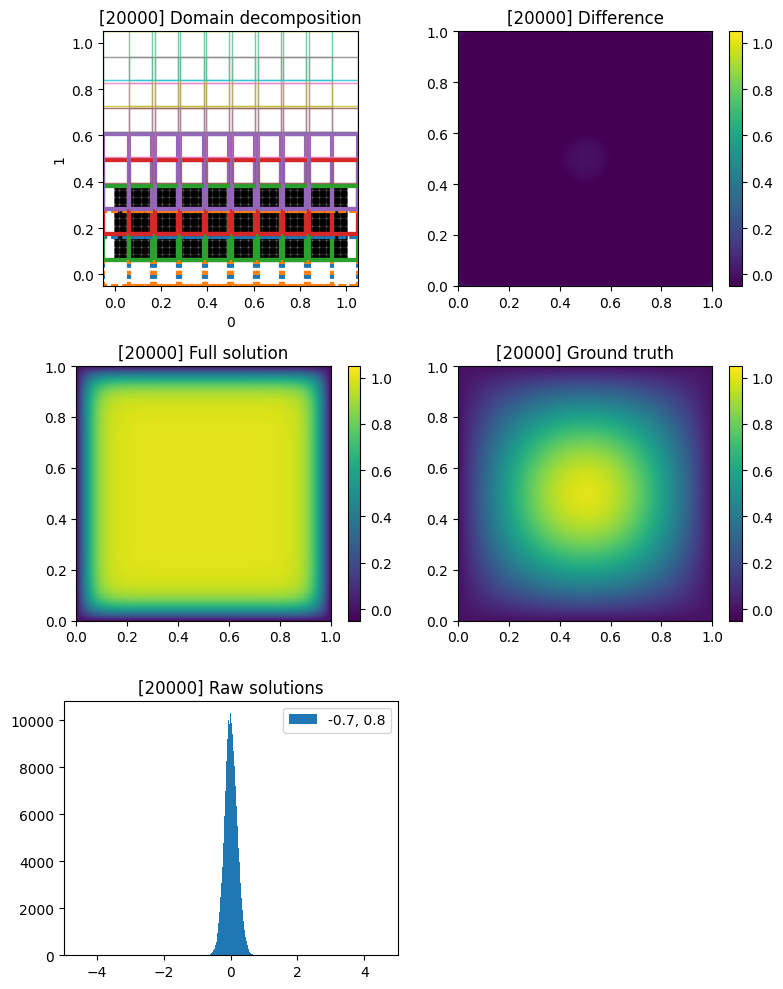

[INFO] 2025-03-25 21:58:05 - [i: 21000/100000] loss: 4896.8896 rate: 6726.4 elapsed: 0.01 hr test
[INFO] 2025-03-25 21:58:05 - [i: 22000/100000] loss: 4896.8896 rate: 6806.2 elapsed: 0.01 hr test
[INFO] 2025-03-25 21:58:05 - [i: 23000/100000] loss: 4896.8896 rate: 6516.2 elapsed: 0.01 hr test
[INFO] 2025-03-25 21:58:05 - [i: 24000/100000] loss: 4896.8896 rate: 6400.0 elapsed: 0.01 hr test
[INFO] 2025-03-25 21:58:05 - [i: 25000/100000] loss: 4896.8896 rate: 6804.1 elapsed: 0.01 hr test
fs (('test', <Figure size 800x1000 with 8 Axes>),)
True


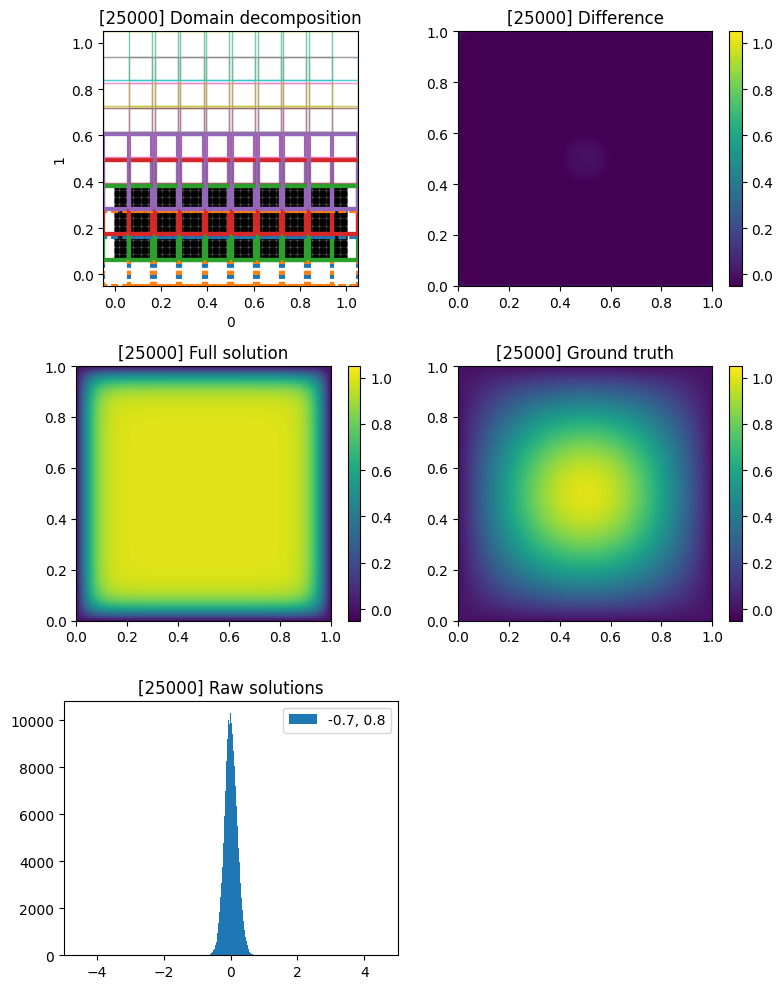

[INFO] 2025-03-25 21:58:07 - [i: 26000/100000] loss: 4896.8896 rate: 6522.7 elapsed: 0.01 hr test
[INFO] 2025-03-25 21:58:07 - [i: 26316/100000] Updating active inputs..
[INFO] 2025-03-25 21:58:07 - [i: 26316/100000] Average number of points/dimension in active subdomains: 59.87
[INFO] 2025-03-25 21:58:07 - [i: 26316/100000] Updating active inputs done (0.46 s)
[INFO] 2025-03-25 21:58:07 - [i: 26316/100000] Compiling update step..
[INFO] 2025-03-25 21:58:07 - [i: 26316/100000] Compiling done (0.02 s)
[INFO] 2025-03-25 21:58:07 - [i: 27000/100000] loss: 3056.0256 rate: 1512.2 elapsed: 0.01 hr test
[INFO] 2025-03-25 21:58:07 - [i: 28000/100000] loss: 3056.0256 rate: 6047.8 elapsed: 0.01 hr test
[INFO] 2025-03-25 21:58:08 - [i: 29000/100000] loss: 3056.0256 rate: 7037.4 elapsed: 0.01 hr test
[INFO] 2025-03-25 21:58:08 - [i: 30000/100000] loss: 3056.0256 rate: 6470.4 elapsed: 0.01 hr test
fs (('test', <Figure size 800x1000 with 8 Axes>),)
True


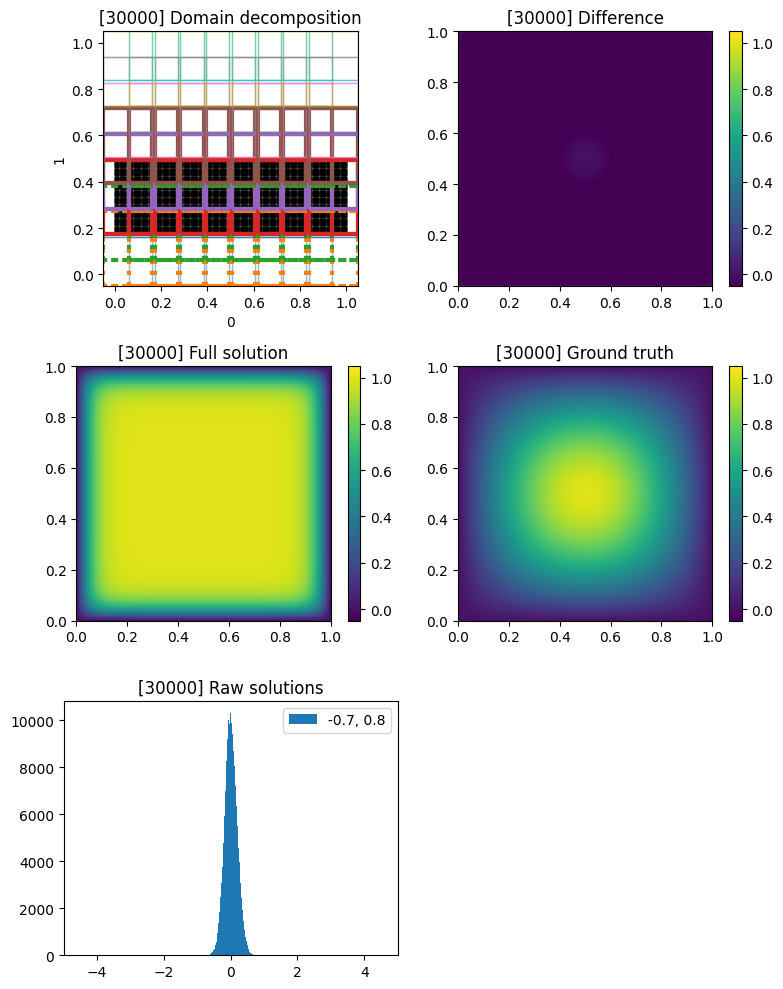

[INFO] 2025-03-25 21:58:09 - [i: 31000/100000] loss: 3056.0256 rate: 6388.5 elapsed: 0.01 hr test
[INFO] 2025-03-25 21:58:10 - [i: 32000/100000] loss: 3056.0256 rate: 6042.6 elapsed: 0.01 hr test
[INFO] 2025-03-25 21:58:10 - [i: 33000/100000] loss: 3056.0256 rate: 6753.0 elapsed: 0.01 hr test
[INFO] 2025-03-25 21:58:10 - [i: 34000/100000] loss: 3056.0256 rate: 6650.9 elapsed: 0.01 hr test
[INFO] 2025-03-25 21:58:10 - [i: 35000/100000] loss: 3056.0256 rate: 6222.9 elapsed: 0.01 hr test
fs (('test', <Figure size 800x1000 with 8 Axes>),)
True


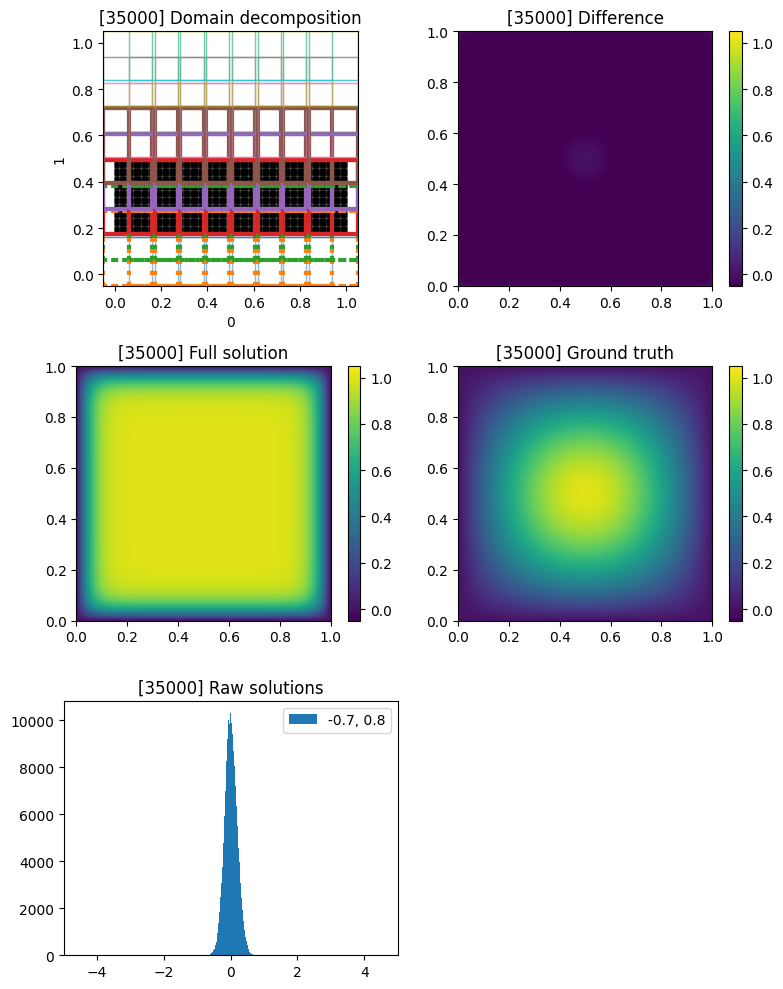

[INFO] 2025-03-25 21:58:12 - [i: 36000/100000] loss: 3056.0256 rate: 6470.5 elapsed: 0.01 hr test
[INFO] 2025-03-25 21:58:12 - [i: 36843/100000] Updating active inputs..
[INFO] 2025-03-25 21:58:12 - [i: 36843/100000] Average number of points/dimension in active subdomains: 59.87
[INFO] 2025-03-25 21:58:12 - [i: 36843/100000] Updating active inputs done (0.15 s)
[INFO] 2025-03-25 21:58:12 - [i: 36843/100000] Compiling update step..
[INFO] 2025-03-25 21:58:12 - [i: 36843/100000] Compiling done (0.01 s)
[INFO] 2025-03-25 21:58:12 - [i: 37000/100000] loss: 3039.8303 rate: 2943.5 elapsed: 0.01 hr test
[INFO] 2025-03-25 21:58:12 - [i: 38000/100000] loss: 3039.8303 rate: 6950.2 elapsed: 0.01 hr test
[INFO] 2025-03-25 21:58:12 - [i: 39000/100000] loss: 3039.8303 rate: 6852.4 elapsed: 0.01 hr test
[INFO] 2025-03-25 21:58:12 - [i: 40000/100000] loss: 3039.8303 rate: 6703.2 elapsed: 0.01 hr test
fs (('test', <Figure size 800x1000 with 8 Axes>),)
True


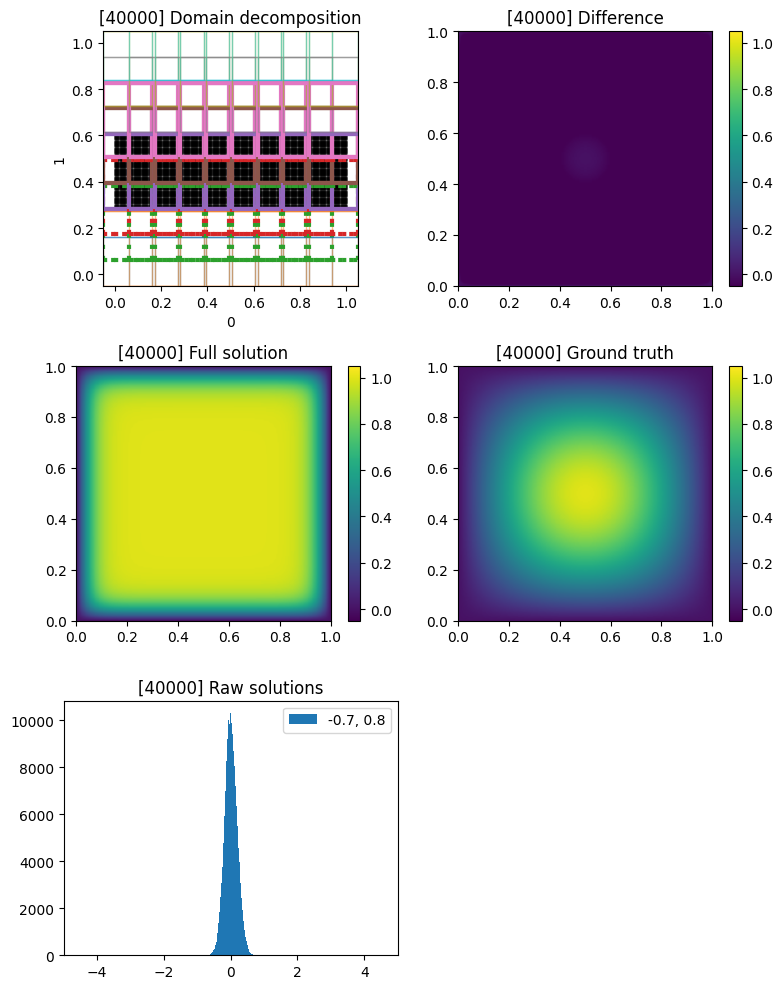

[INFO] 2025-03-25 21:58:14 - [i: 41000/100000] loss: 3039.8303 rate: 6113.4 elapsed: 0.01 hr test
[INFO] 2025-03-25 21:58:14 - [i: 42000/100000] loss: 3039.8303 rate: 6122.4 elapsed: 0.01 hr test
[INFO] 2025-03-25 21:58:14 - [i: 43000/100000] loss: 3039.8303 rate: 6489.6 elapsed: 0.01 hr test
[INFO] 2025-03-25 21:58:14 - [i: 44000/100000] loss: 3039.8303 rate: 6465.2 elapsed: 0.01 hr test
[INFO] 2025-03-25 21:58:14 - [i: 45000/100000] loss: 3039.8303 rate: 6812.1 elapsed: 0.01 hr test
fs (('test', <Figure size 800x1000 with 8 Axes>),)
True


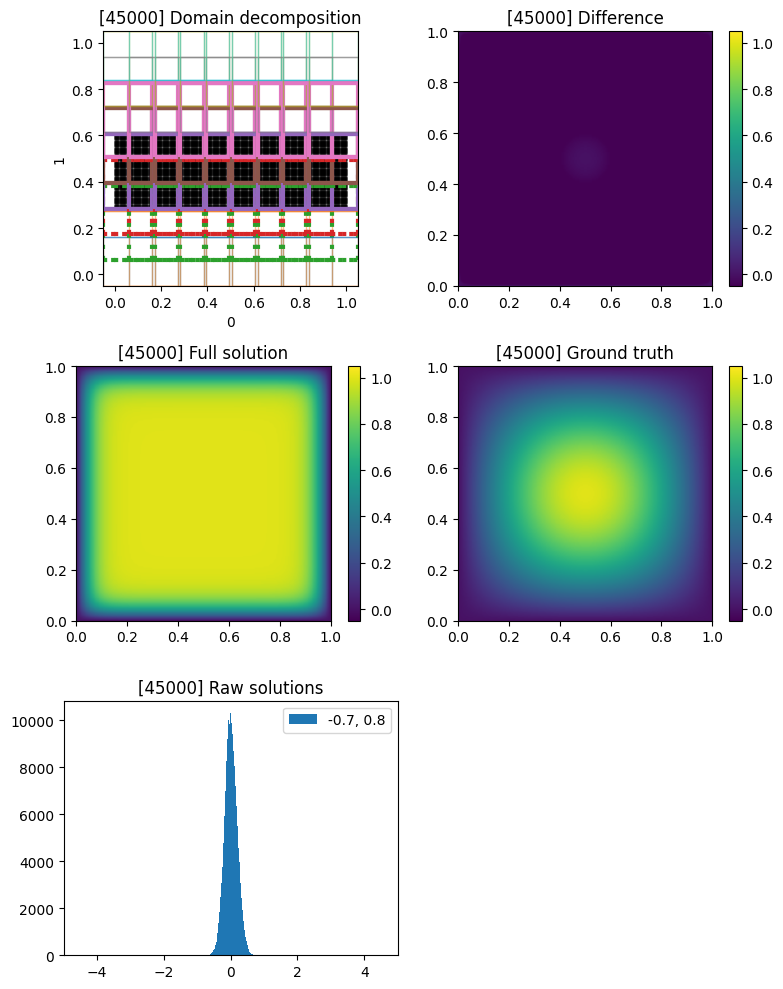

[INFO] 2025-03-25 21:58:16 - [i: 46000/100000] loss: 3039.8303 rate: 6712.9 elapsed: 0.01 hr test
[INFO] 2025-03-25 21:58:16 - [i: 47000/100000] loss: 3039.8303 rate: 5862.5 elapsed: 0.01 hr test
[INFO] 2025-03-25 21:58:16 - [i: 47369/100000] Updating active inputs..
[INFO] 2025-03-25 21:58:16 - [i: 47369/100000] Average number of points/dimension in active subdomains: 59.87
[INFO] 2025-03-25 21:58:16 - [i: 47369/100000] Updating active inputs done (0.15 s)
[INFO] 2025-03-25 21:58:16 - [i: 47369/100000] Compiling update step..
[INFO] 2025-03-25 21:58:16 - [i: 47369/100000] Compiling done (0.01 s)
[INFO] 2025-03-25 21:58:16 - [i: 48000/100000] loss: 3039.8303 rate: 2915.3 elapsed: 0.01 hr test
[INFO] 2025-03-25 21:58:16 - [i: 49000/100000] loss: 3039.8303 rate: 6332.7 elapsed: 0.01 hr test
[INFO] 2025-03-25 21:58:17 - [i: 50000/100000] loss: 3039.8303 rate: 5901.1 elapsed: 0.01 hr test
fs (('test', <Figure size 800x1000 with 8 Axes>),)
True


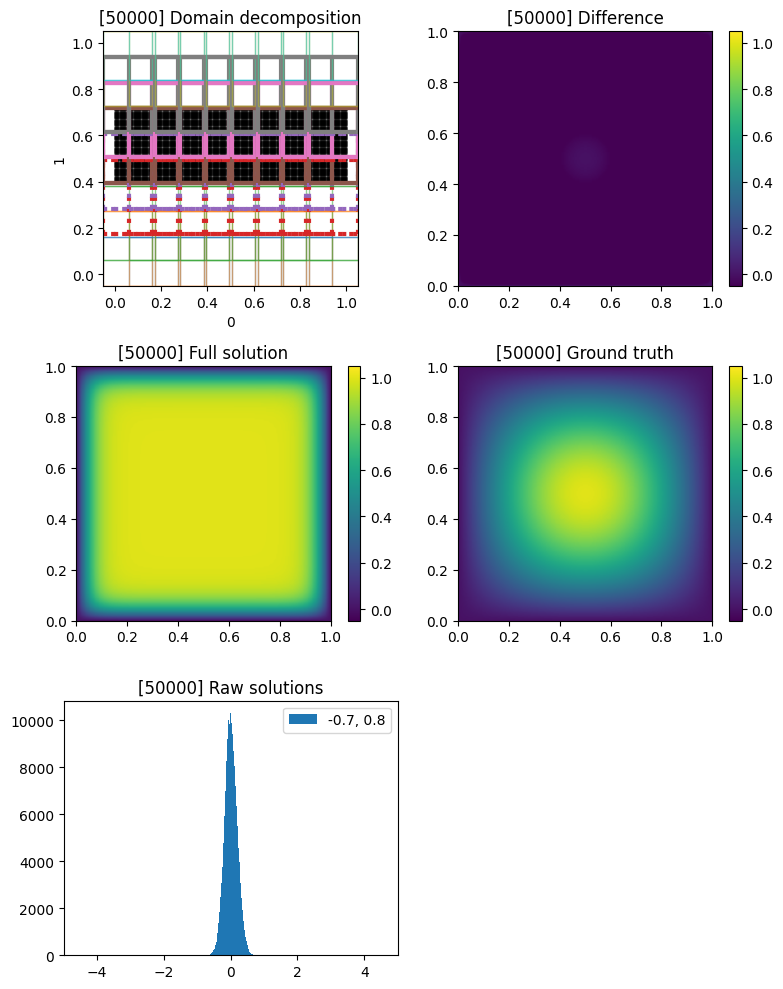

[INFO] 2025-03-25 21:58:18 - [i: 51000/100000] loss: 3039.8303 rate: 6370.9 elapsed: 0.01 hr test
[INFO] 2025-03-25 21:58:18 - [i: 52000/100000] loss: 3039.8303 rate: 6367.4 elapsed: 0.01 hr test
[INFO] 2025-03-25 21:58:18 - [i: 53000/100000] loss: 3039.8303 rate: 6835.0 elapsed: 0.01 hr test
[INFO] 2025-03-25 21:58:19 - [i: 54000/100000] loss: 3039.8303 rate: 6643.2 elapsed: 0.01 hr test
[INFO] 2025-03-25 21:58:19 - [i: 55000/100000] loss: 3039.8303 rate: 7211.5 elapsed: 0.01 hr test
fs (('test', <Figure size 800x1000 with 8 Axes>),)
True


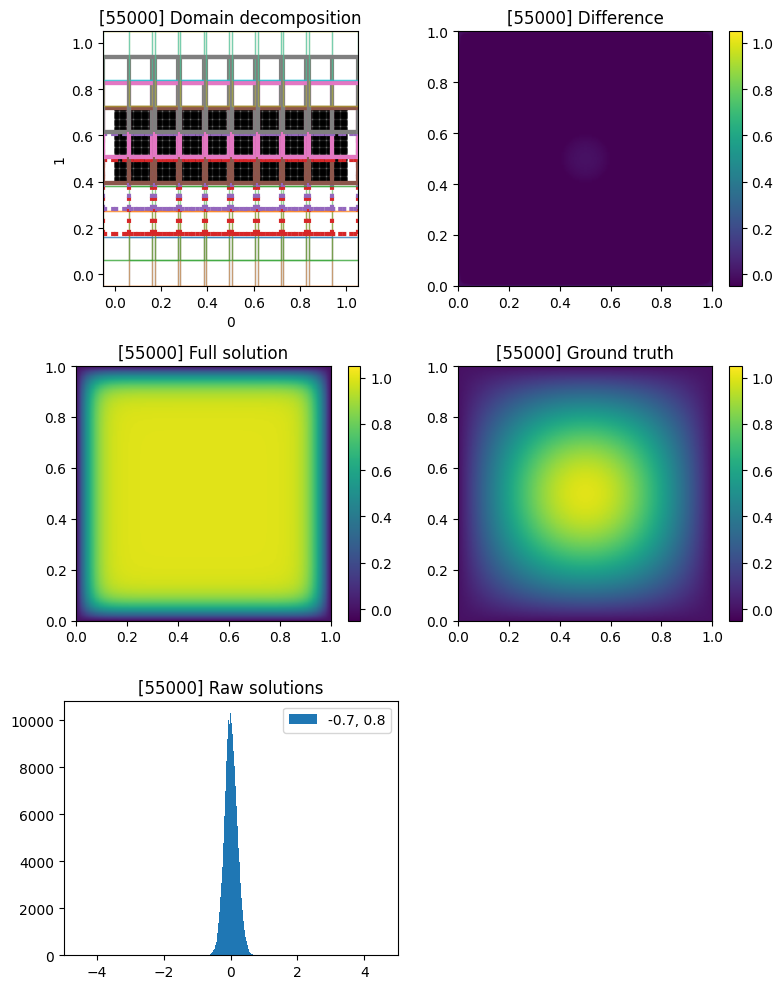

[INFO] 2025-03-25 21:58:20 - [i: 56000/100000] loss: 3039.8303 rate: 6443.9 elapsed: 0.01 hr test
[INFO] 2025-03-25 21:58:20 - [i: 57000/100000] loss: 3039.8303 rate: 5442.9 elapsed: 0.01 hr test
[INFO] 2025-03-25 21:58:21 - [i: 57895/100000] Updating active inputs..
[INFO] 2025-03-25 21:58:21 - [i: 57895/100000] Average number of points/dimension in active subdomains: 59.87
[INFO] 2025-03-25 21:58:21 - [i: 57895/100000] Updating active inputs done (0.14 s)
[INFO] 2025-03-25 21:58:21 - [i: 57895/100000] Compiling update step..
[INFO] 2025-03-25 21:58:21 - [i: 57895/100000] Compiling done (0.02 s)
[INFO] 2025-03-25 21:58:21 - [i: 58000/100000] loss: 3056.0256 rate: 3123.0 elapsed: 0.01 hr test
[INFO] 2025-03-25 21:58:21 - [i: 59000/100000] loss: 3056.0256 rate: 7079.0 elapsed: 0.01 hr test
[INFO] 2025-03-25 21:58:21 - [i: 60000/100000] loss: 3056.0256 rate: 7632.4 elapsed: 0.01 hr test
fs (('test', <Figure size 800x1000 with 8 Axes>),)
True


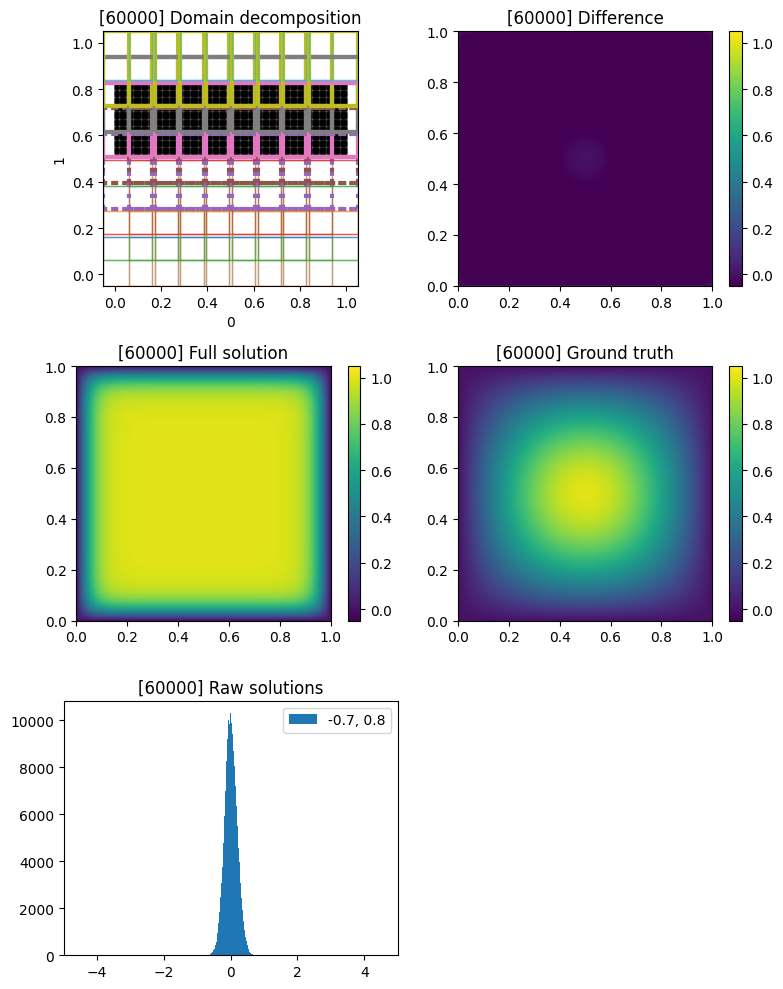

[INFO] 2025-03-25 21:58:22 - [i: 61000/100000] loss: 3056.0256 rate: 6835.5 elapsed: 0.01 hr test
[INFO] 2025-03-25 21:58:23 - [i: 62000/100000] loss: 3056.0256 rate: 5715.0 elapsed: 0.01 hr test
[INFO] 2025-03-25 21:58:23 - [i: 63000/100000] loss: 3056.0256 rate: 6738.6 elapsed: 0.01 hr test
[INFO] 2025-03-25 21:58:23 - [i: 64000/100000] loss: 3056.0256 rate: 7192.9 elapsed: 0.01 hr test
[INFO] 2025-03-25 21:58:23 - [i: 65000/100000] loss: 3056.0256 rate: 7151.0 elapsed: 0.01 hr test
fs (('test', <Figure size 800x1000 with 8 Axes>),)
True


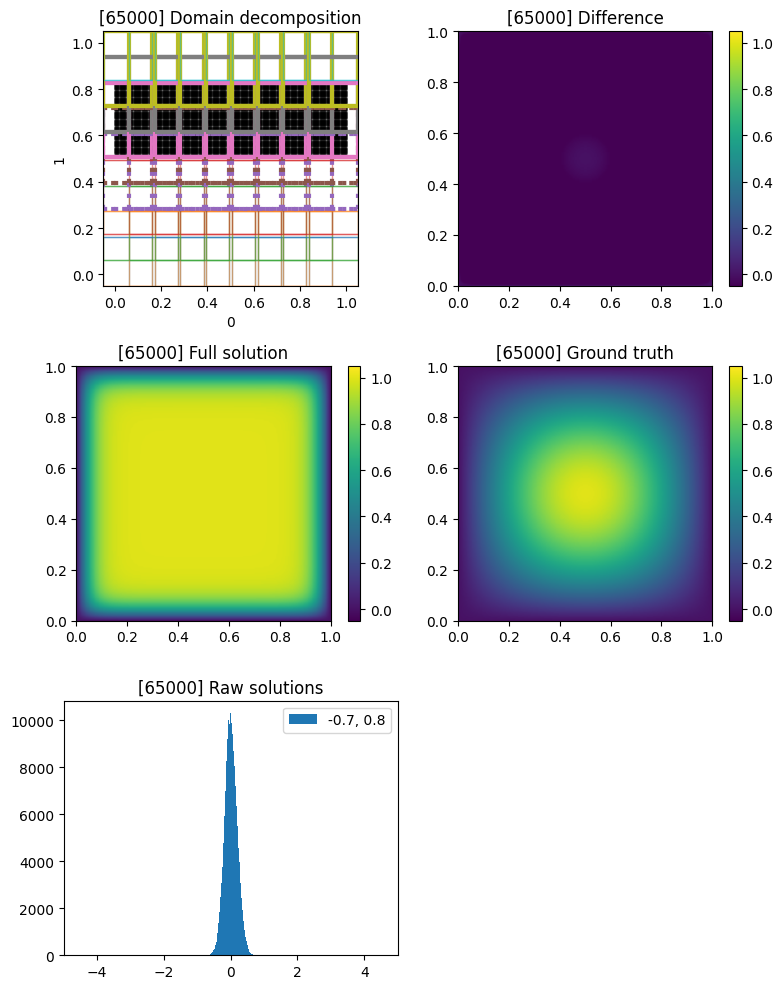

[INFO] 2025-03-25 21:58:24 - [i: 66000/100000] loss: 3056.0256 rate: 6721.1 elapsed: 0.01 hr test
[INFO] 2025-03-25 21:58:25 - [i: 67000/100000] loss: 3056.0256 rate: 5400.5 elapsed: 0.01 hr test
[INFO] 2025-03-25 21:58:25 - [i: 68000/100000] loss: 3056.0256 rate: 7055.7 elapsed: 0.01 hr test
[INFO] 2025-03-25 21:58:25 - [i: 68422/100000] Updating active inputs..
[INFO] 2025-03-25 21:58:25 - [i: 68422/100000] Average number of points/dimension in active subdomains: 59.87
[INFO] 2025-03-25 21:58:25 - [i: 68422/100000] Updating active inputs done (0.32 s)
[INFO] 2025-03-25 21:58:25 - [i: 68422/100000] Compiling update step..
[INFO] 2025-03-25 21:58:25 - [i: 68422/100000] Compiling done (0.01 s)
[INFO] 2025-03-25 21:58:25 - [i: 69000/100000] loss: 4896.8892 rate: 1891.9 elapsed: 0.01 hr test
[INFO] 2025-03-25 21:58:25 - [i: 70000/100000] loss: 4896.8892 rate: 6178.5 elapsed: 0.01 hr test
fs (('test', <Figure size 800x1000 with 8 Axes>),)
True


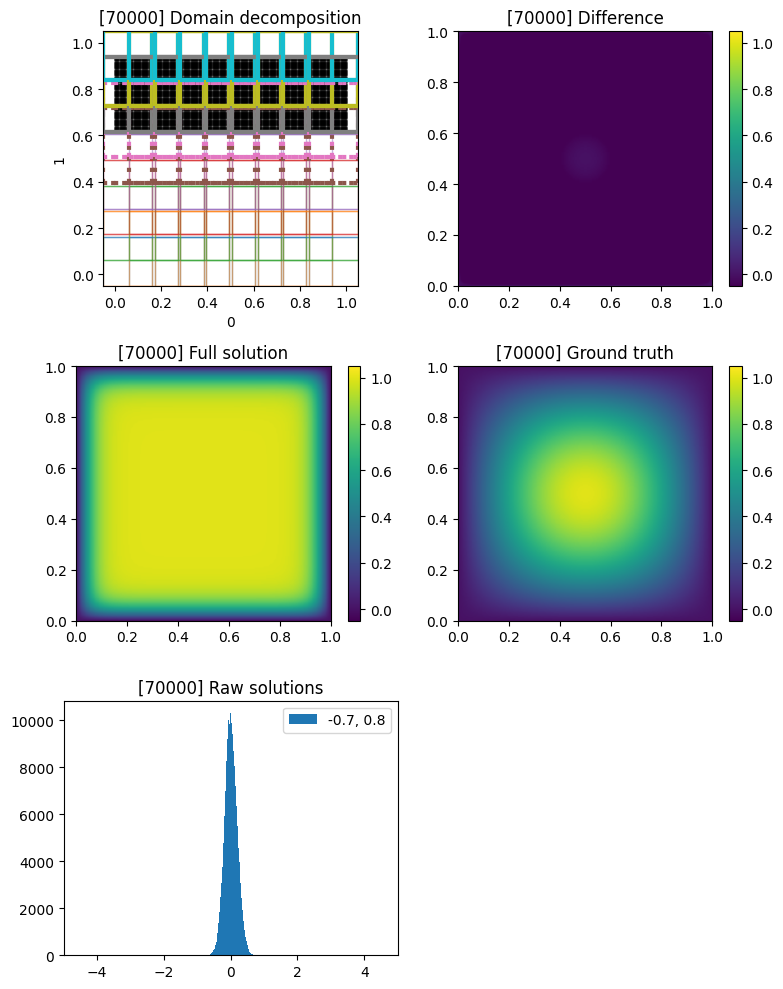

[INFO] 2025-03-25 21:58:27 - [i: 71000/100000] loss: 4896.8892 rate: 6597.1 elapsed: 0.01 hr test
[INFO] 2025-03-25 21:58:27 - [i: 72000/100000] loss: 4896.8892 rate: 6845.5 elapsed: 0.01 hr test
[INFO] 2025-03-25 21:58:27 - [i: 73000/100000] loss: 4896.8892 rate: 7027.3 elapsed: 0.01 hr test
[INFO] 2025-03-25 21:58:27 - [i: 74000/100000] loss: 4896.8892 rate: 6861.8 elapsed: 0.01 hr test
[INFO] 2025-03-25 21:58:28 - [i: 75000/100000] loss: 4896.8892 rate: 6137.2 elapsed: 0.01 hr test
fs (('test', <Figure size 800x1000 with 8 Axes>),)
True


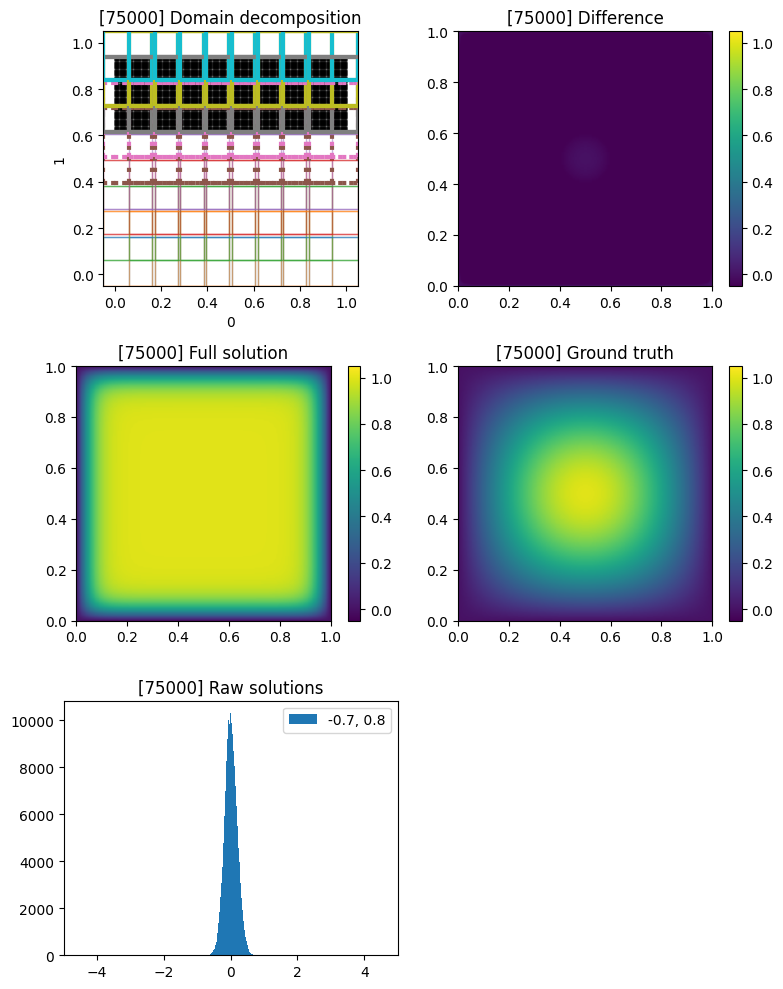

[INFO] 2025-03-25 21:58:29 - [i: 76000/100000] loss: 4896.8892 rate: 6119.6 elapsed: 0.01 hr test
[INFO] 2025-03-25 21:58:29 - [i: 77000/100000] loss: 4896.8892 rate: 6029.4 elapsed: 0.01 hr test
[INFO] 2025-03-25 21:58:29 - [i: 78000/100000] loss: 4896.8892 rate: 5806.9 elapsed: 0.01 hr test
[INFO] 2025-03-25 21:58:30 - [i: 78948/100000] Updating active inputs..
[INFO] 2025-03-25 21:58:30 - [i: 78948/100000] Average number of points/dimension in active subdomains: 55.50
[INFO] 2025-03-25 21:58:30 - [i: 78948/100000] Updating active inputs done (0.34 s)
[INFO] 2025-03-25 21:58:30 - [i: 78948/100000] Compiling update step..
[INFO] 2025-03-25 21:58:30 - x_batch
[INFO] 2025-03-25 21:58:30 - (11000, 2), float32, JVPTracer
[INFO] 2025-03-25 21:58:30 - x_take
[INFO] 2025-03-25 21:58:30 - (84000, 2), float32, JVPTracer
input: (2,)
output: (1,)
[INFO] 2025-03-25 21:58:30 - x_batch
[INFO] 2025-03-25 21:58:30 - (11000, 2), float32, JVPTracer
[INFO] 2025-03-25 21:58:30 - x_take
[INFO] 2025-03-25 

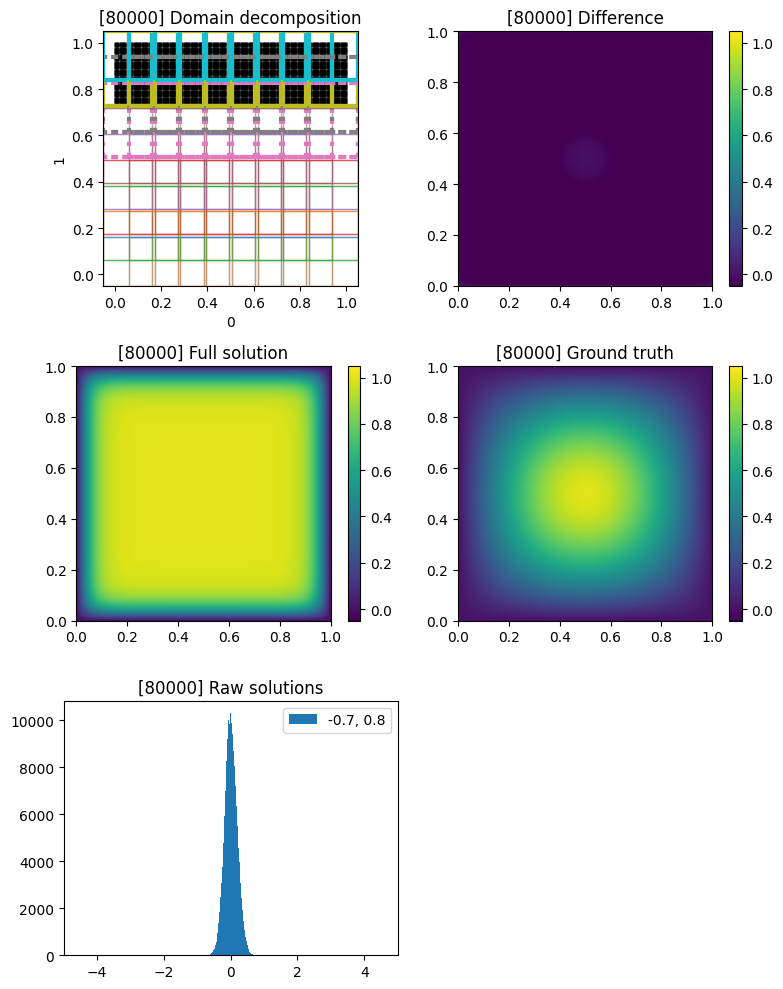

[INFO] 2025-03-25 21:58:32 - [i: 81000/100000] loss: 8077.9985 rate: 5662.3 elapsed: 0.02 hr test
[INFO] 2025-03-25 21:58:32 - [i: 82000/100000] loss: 8077.9985 rate: 6591.5 elapsed: 0.02 hr test
[INFO] 2025-03-25 21:58:32 - [i: 83000/100000] loss: 8077.9985 rate: 6530.2 elapsed: 0.02 hr test
[INFO] 2025-03-25 21:58:33 - [i: 84000/100000] loss: 8077.9985 rate: 6640.9 elapsed: 0.02 hr test
[INFO] 2025-03-25 21:58:33 - [i: 85000/100000] loss: 8077.9985 rate: 7187.2 elapsed: 0.02 hr test
fs (('test', <Figure size 800x1000 with 8 Axes>),)
True


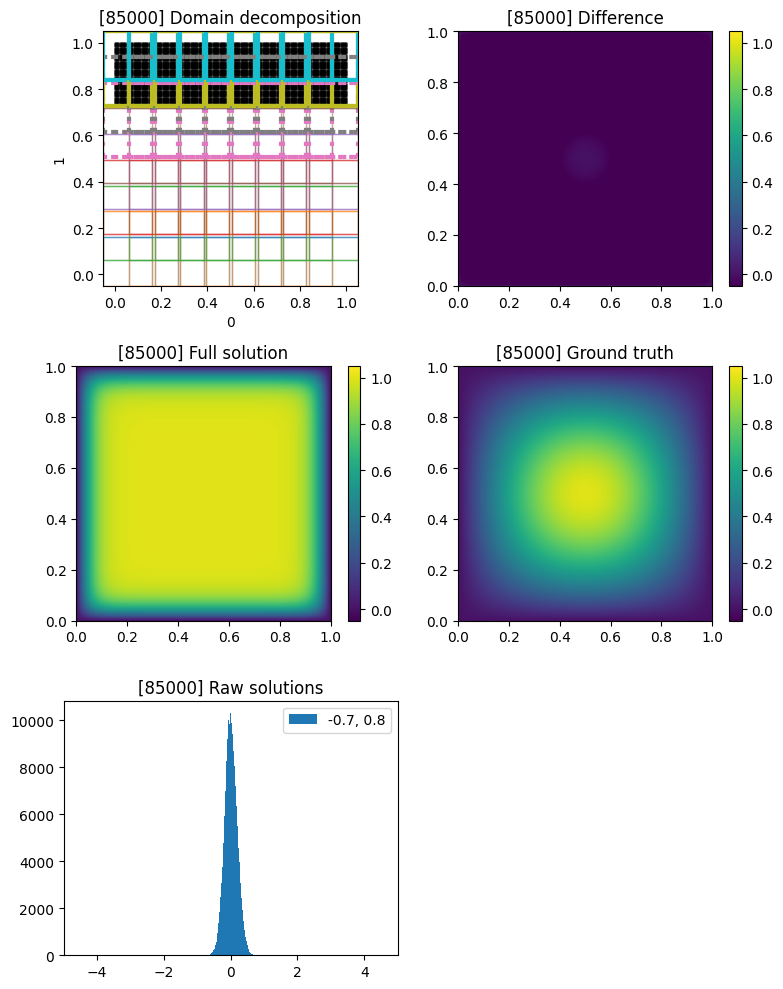

[INFO] 2025-03-25 21:58:34 - [i: 86000/100000] loss: 8077.9985 rate: 6708.2 elapsed: 0.02 hr test
[INFO] 2025-03-25 21:58:34 - [i: 87000/100000] loss: 8077.9985 rate: 5844.7 elapsed: 0.02 hr test
[INFO] 2025-03-25 21:58:34 - [i: 88000/100000] loss: 8077.9985 rate: 6136.1 elapsed: 0.02 hr test
[INFO] 2025-03-25 21:58:35 - [i: 89000/100000] loss: 8077.9985 rate: 7154.2 elapsed: 0.02 hr test
[INFO] 2025-03-25 21:58:35 - [i: 89474/100000] Updating active inputs..
[INFO] 2025-03-25 21:58:35 - [i: 89474/100000] Average number of points/dimension in active subdomains: 42.99
[INFO] 2025-03-25 21:58:35 - [i: 89474/100000] Updating active inputs done (0.22 s)
[INFO] 2025-03-25 21:58:35 - [i: 89474/100000] Compiling update step..
[INFO] 2025-03-25 21:58:35 - x_batch
[INFO] 2025-03-25 21:58:35 - (6600, 2), float32, JVPTracer
[INFO] 2025-03-25 21:58:35 - x_take
[INFO] 2025-03-25 21:58:35 - (48160, 2), float32, JVPTracer
input: (2,)
output: (1,)
[INFO] 2025-03-25 21:58:35 - x_batch
[INFO] 2025-03-25

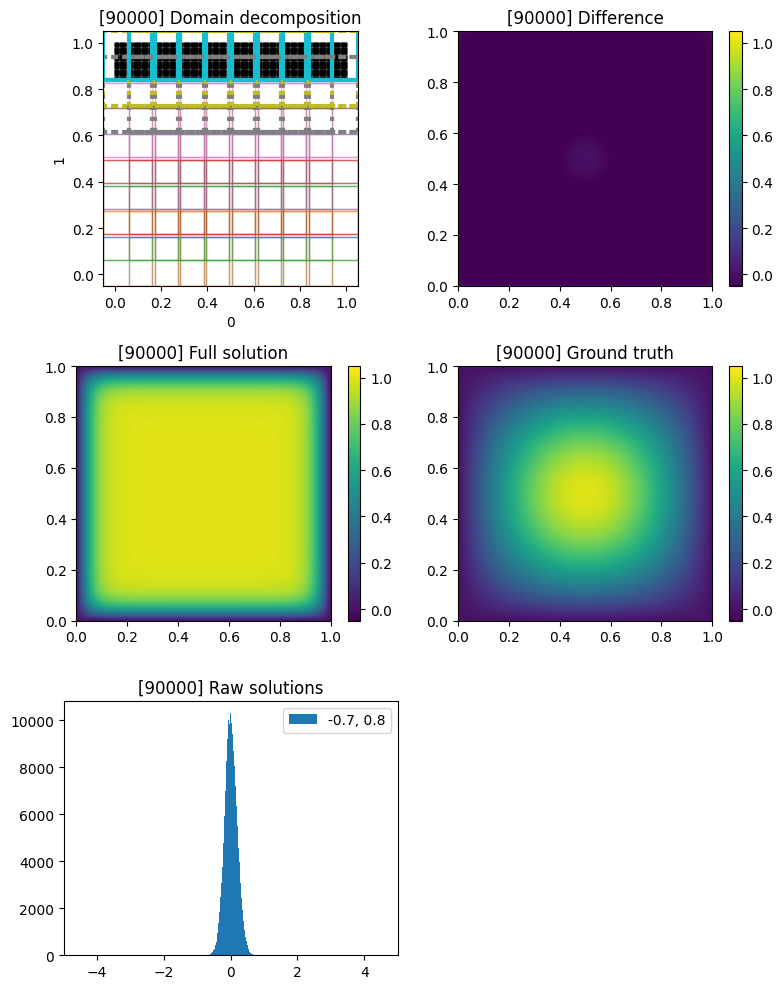

[INFO] 2025-03-25 21:58:37 - [i: 91000/100000] loss: 11380.9600 rate: 6130.6 elapsed: 0.02 hr test
[INFO] 2025-03-25 21:58:37 - [i: 92000/100000] loss: 11380.9600 rate: 5658.8 elapsed: 0.02 hr test
[INFO] 2025-03-25 21:58:38 - [i: 93000/100000] loss: 11380.9600 rate: 6162.5 elapsed: 0.02 hr test
[INFO] 2025-03-25 21:58:38 - [i: 94000/100000] loss: 11380.9600 rate: 7487.0 elapsed: 0.02 hr test
[INFO] 2025-03-25 21:58:38 - [i: 95000/100000] loss: 11380.9600 rate: 6034.5 elapsed: 0.02 hr test
fs (('test', <Figure size 800x1000 with 8 Axes>),)
True


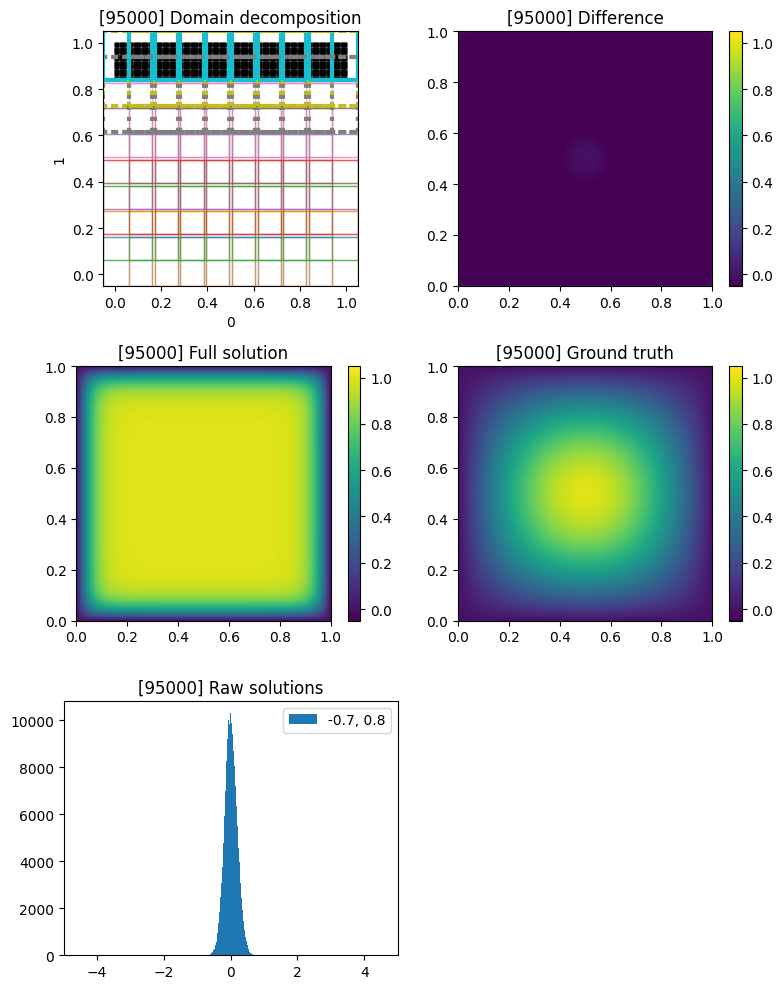

[INFO] 2025-03-25 21:58:40 - [i: 96000/100000] loss: 11380.9600 rate: 6409.9 elapsed: 0.02 hr test
[INFO] 2025-03-25 21:58:40 - [i: 97000/100000] loss: 11380.9600 rate: 5447.9 elapsed: 0.02 hr test
[INFO] 2025-03-25 21:58:40 - [i: 98000/100000] loss: 11380.9600 rate: 6816.4 elapsed: 0.02 hr test
[INFO] 2025-03-25 21:58:40 - [i: 99000/100000] loss: 11380.9600 rate: 6651.1 elapsed: 0.02 hr test
[INFO] 2025-03-25 21:58:40 - [i: 100000/100000] loss: 11380.9600 rate: 6015.0 elapsed: 0.02 hr test
fs (('test', <Figure size 800x1000 with 8 Axes>),)
True


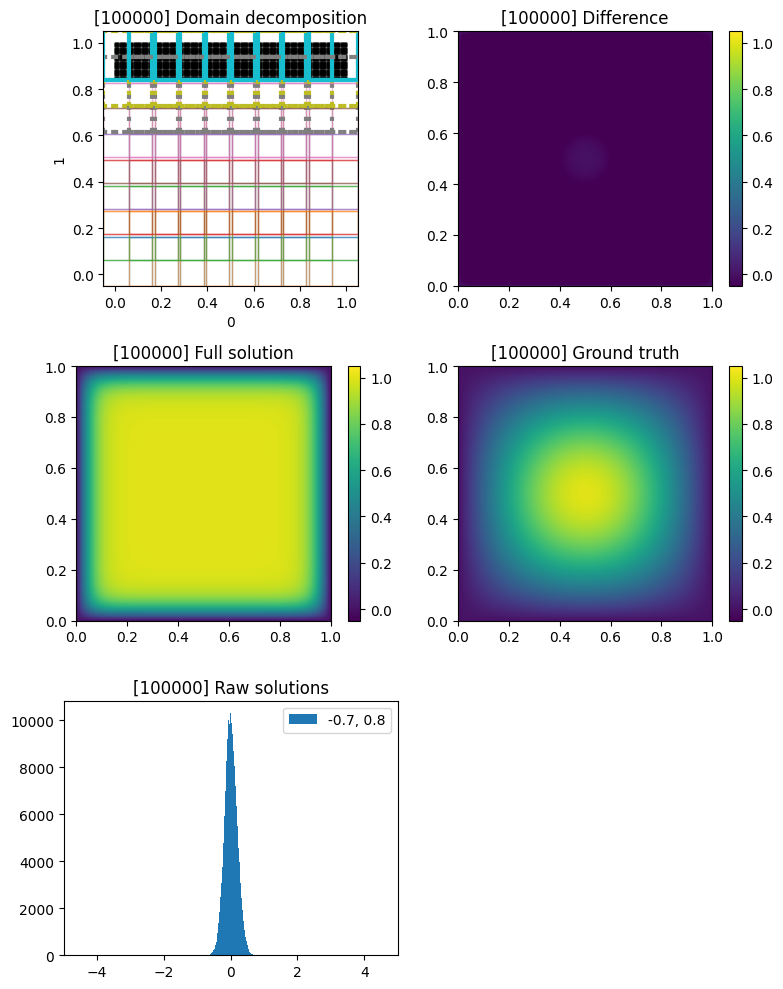

[INFO] 2025-03-25 21:58:41 - [i: 100000/100000] Training complete


In [1]:
import numpy as np

from fbpinns.domains import RectangularDomainND
from fbpinns.problems import BurgersEquation2D, Poisson2D
from fbpinns.decompositions import RectangularDecompositionND
from fbpinns.networks import ChebyshevKAN
from fbpinns.schedulers import LineSchedulerRectangularND
from fbpinns.constants import Constants, get_subdomain_ws
from fbpinns.trainers import FBPINNTrainer

subdomain_xs=[np.linspace(0,1,10), np.linspace(0,1,10)]
c = Constants(
    domain=RectangularDomainND,
    domain_init_kwargs = dict(
        xmin=np.array([0.,0.]),
        xmax=np.array([1.,1.])
        ),
    problem=Poisson2D,
    problem_init_kwargs = dict(),
    decomposition=RectangularDecompositionND,
    decomposition_init_kwargs=dict(
        subdomain_xs=subdomain_xs,
        subdomain_ws=get_subdomain_ws(subdomain_xs, 2.9),
        unnorm=(0., 3.),
    ),
    network=ChebyshevKAN,
    network_init_kwargs=dict(
        input_dim=2,
        output_dim=1,
        degree=9
    ),
    scheduler = LineSchedulerRectangularND,
    scheduler_kwargs = dict(
        point=[0.], iaxis=0,
    ),
    # First element: interior sampling shape for the physics loss (here 200 x 200 points)
    # Second element: boundary sampling shapes; for 2D, we need 4 tuples (one for each boundary)
    ns=((200, 200),),
    # n_test provides the test sampling shape for the interior (here also 200 x 200)
    n_test=(200, 200),
    n_steps=100000,
    clear_output=False,
)

run = FBPINNTrainer(c)
all_params = run.train()